#K평균 군집화 K-Means Clustering

In [ ]:
#데이터 준비
import numpy as np
import pandas as pd

In [ ]:
customers = pd.read_csv('/content/Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df = customers[['Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
#스케일링
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df = sc.fit_transform(df)
df[:10]

array([[0.07688326, 0.60048735],
       [0.07260713, 0.41246733],
       [0.04769793, 0.42460754],
       [0.06816217, 0.35894822],
       [0.07053078, 0.60327405],
       [0.13433306, 0.76030228],
       [0.05744981, 0.44562465],
       [0.08514326, 0.54139484],
       [0.04806944, 0.26046361],
       [0.07850302, 0.43641571]])

In [ ]:
#알고리즘 학습
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(df)

KMeans(n_clusters=3)

In [ ]:
#스케일링
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df = sc.fit_transform(customers[['Annual Income (k$)', 'Spending Score (1-100)']])
#예측
pred = model.predict(df)
customers['label'] = pred
pred[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

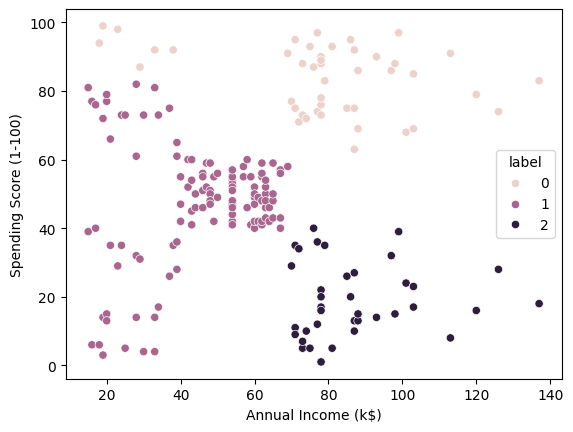

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=customers, x='Annual Income (k$)',
 y='Spending Score (1-100)', hue='label')
plt.show()

In [ ]:
inertia = []
for i in range(1,10):
    model = KMeans(n_clusters= i, init = 'random',random_state=42)
    model.fit(df)
    inertia.append(model.inertia_)

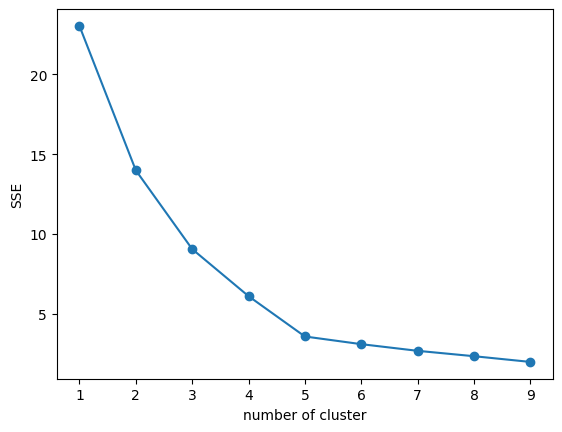

In [ ]:
plt.subplots()
plt.plot(range(1,10),inertia,marker = 'o')
plt.xlabel("number of cluster")
plt.ylabel("SSE")
plt.show()

#차원축소

In [ ]:
#데이터 준비
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
dfX = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dfY = pd.DataFrame(data=iris.target, columns=['species'])
df = pd.concat([dfX,dfY], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#피처와 레이블 분리
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
df = pd.DataFrame(data=X2, columns = ['PC_1', 'PC_2'])
df.head()

,PC_1,PC_2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


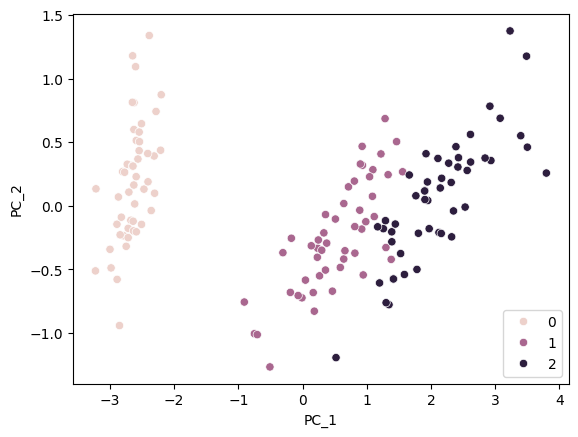

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=df['PC_1'], y=df['PC_2'], hue=y.values)
plt.show()

##데이터 분류

In [ ]:
#데이터 준비
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

#선형회귀: 선형으로 가정하고 회귀계수를 데이터로부터 추정

가장 데이터를 잘 설명하는 선, 가장 에러값이 작은 경우를 찾음

In [ ]:
import pandas as pd
manhattan = pd.read_csv('/content/manhattan.csv')
manhattan.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [ ]:
manhattan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [ ]:
#상관관계

In [ ]:
numeric_manhattan = manhattan.select_dtypes(include=['number'])
corr_matrix = numeric_manhattan.corr()
corr_matrix["rent"].sort_values(ascending=False)

,rent
rent,1.000000
size_sqft,0.857954
bathrooms,0.769474
bedrooms,0.638336
floor,0.215867
has_washer_dryer,0.053873
has_dishwasher,0.052241
has_elevator,0.051860
has_gym,0.040609
has_roofdeck,0.035165


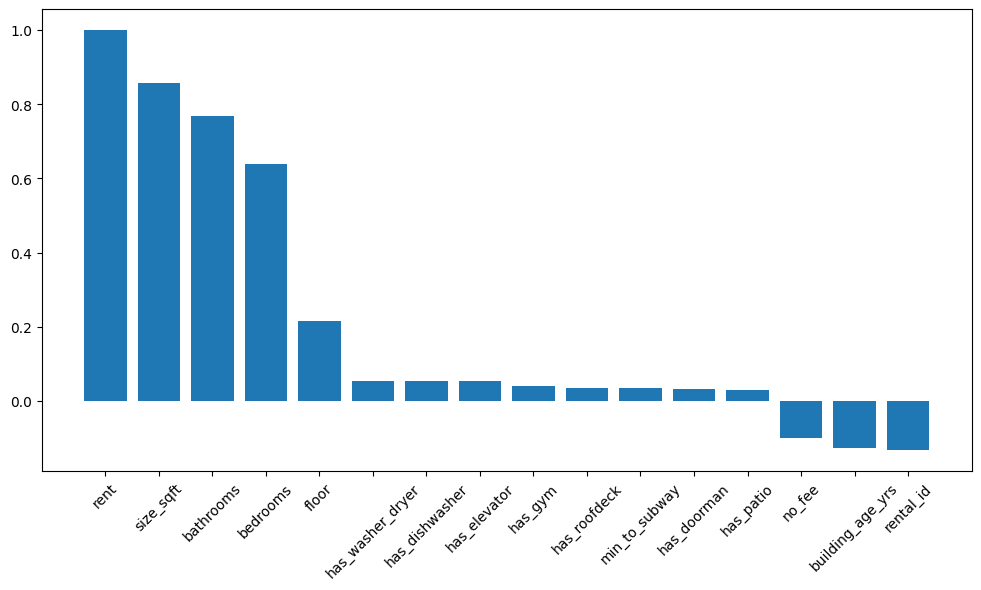

In [ ]:
import matplotlib.pyplot as plt
corr_df = pd.DataFrame(corr_matrix["rent"].sort_values(ascending=False))
plt.figure(figsize=(12,6))
plt.bar(corr_df.index, corr_df["rent"])
plt.xticks(rotation=45)
plt.show()

In [ ]:
#피처 선택
X = manhattan[['size_sqft','bathrooms','bedrooms', 'floor',
'has_washer_dryer', 'has_dishwasher','has_elevator']]
y = manhattan[['rent']]

In [ ]:
#테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.3, random_state=42)
X_train.head()

,size_sqft,bathrooms,bedrooms,floor,has_washer_dryer,has_dishwasher,has_elevator
944,631,1,2.0,1.0,0,0,1
199,850,1,2.0,4.0,0,0,0
1457,800,1,2.0,5.0,1,1,1
2627,775,1,1.0,12.0,0,0,0
801,450,1,0.0,5.0,0,1,0


In [ ]:
#모델 학습
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('coef : ', lr.coef_)
print('intercept : ', lr.intercept_)

coef :  [[   5.01122355 1179.86269712 -339.69056329   33.14750417   79.88853766
    13.07088579   14.74563067]]
intercept :  [-1151.72616741]


In [ ]:
#모델평가
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
print('mse :', mse)
print('rmse :', rmse)
print('mae :', mae)
print('r2score :', r2score)

mse : 2481490.247806446
rmse : 1575.2746578950753
mae : 974.6249719825921
r2score : 0.7452489452336162


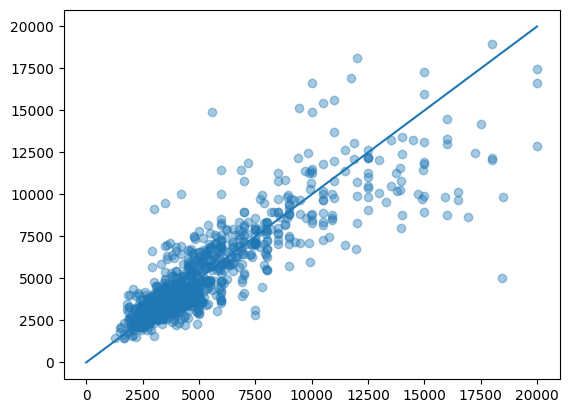

In [ ]:
#예측결과 시각화
plt.scatter(y_test, y_pred, alpha = 0.4)
plt.plot([0, 20000], [0, 20000])
plt.show()

##곡선 형태이면 다항 회귀 모델 사용

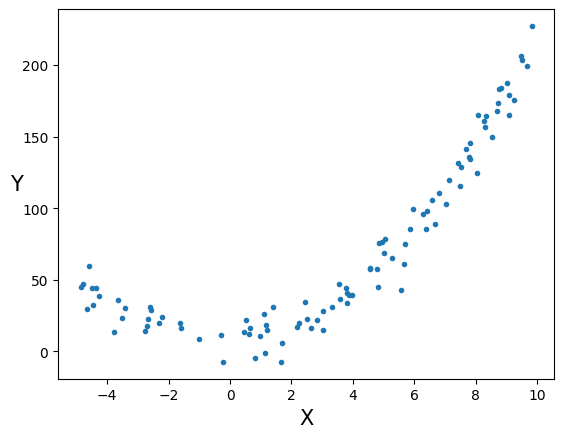

In [ ]:
#데이터 준비
import numpy as np
import matplotlib.pyplot as plt
X = -5 + 15 * np.random.rand(100, 1)
noise = 10 * np.random.randn(100, 1)
y = 2*X**2 + 1*X + 10 + noise
plt.plot(X, y, ".")
plt.ylabel("Y", fontsize=15, rotation=0)
plt.xlabel("X", fontsize=15)
plt.show()